In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

# Creating your first Bayesian Network with pyAgrum

(This example is based on an OpenBayes [closed] website tutorial)

<p>A <b>Bayesian network</b> (BN) is composed of <b>random variables</b> (nodes) and their conditional dependencies (arcs) forming an acyclic directecd graph (DAG). A <b>conditional probability table</b> (CPT) is associated to each node :
<center><img src="files/images/waterprinkler.png"></center>
Such a BN allows to manipulate the joint probability $P(C,S,R,W)$&nbsp;&nbsp;&nbsp;using this decomposition :
<center>
    $P(C,S,R,W)=\sum_X P(X | Parents_X) = P(C) \cdot P(S | C) \cdot P(R | C) \cdot P(W | S,R)$
</center>
</p>
<p>
    Imagine you want to create your first bayesian network, say for example the 'Water Sprinkler' network. This is an easy example. All the nodes are boolean (only 2 possible values).
</p>

## Import the pyAgrum package

In [2]:
import pyAgrum as gum

## Create the network topology

### Create the BN

The next line creates an empty BN network with a 'name' property.

In [3]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, parameters: 0, compression ratio: 100-10^-inf% }


### Create the variables

pyAgrum(aGrUM) provides 3 types of variables :
<ul>
    <li>LabelizedVariable</li>
    <li>RangeVariable</li>
    <li>DiscretizedVariable</li>
</ul>
In this tutorial, we will use LabelizedVariable. The next line will create a varible 'c' with 2 values and add it to the BN. The value returned is the id of the node in the topology.

In [4]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(c)

0


You can continue adding nodes in the nework this way. Let us use python to compact a bit the code :

In [5]:
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (s,r,w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, parameters: 8, compression ratio: 50% }


### Create the arcs

Now we have to connect nodes. Remember that <tt>c</tt> and <tt>s</tt> are ids for nodes :

In [6]:
bn.addArc(c,s)

Once again, python can help us :

In [7]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, parameters: 18, compression ratio: -12% }


pyAgrum allows use to show a better representation of <tt>bn</tt>. <br/><tt>pyAgrum.lib</tt> is a set of tools written in pyAgrum to help using aGrUM in python. <tt>pyAgrum.lib.notebook</tt> add dedicated functions for iPython notebook.

In [8]:
import pyAgrum.lib.notebook as gnb
bn

<pyAgrum.pyAgrum.BayesNet_double; proxy of <Swig Object of type 'gum::BayesNet< double > *' at 0x7f681675b510> >

### Create the probability tables

Once the network topology is constructed, we must initialize the conditional probability tables (CPT) distributions.
Each CPT is consider as a Potential object in pyAgrum. There is several ways to fill a such object.<br/>

To get the CPT of a variable, use the cpt method of your BayesNet instance with the variable id as parameter.<br/>

Now we are ready to fill in the parameters for each node in our network. There are several ways to add these parameters<br/>

#### Low-level way

In [9]:
bn.cpt(c).fillWith([0.5,0.5])
pass

#### Using the order of variables

In [10]:
bn.cpt(s).var_names

['c', 's']

In [11]:
bn.cpt(s)[:]=[ [0.5,0.5],[0.9,0.1]]

Then $P(S | C=0)=[0.5,0.5]$ <br/>and $P(S | C=1)=[0.9,0.1]$.

In [12]:
print(bn.cpt(s)[1])

[ 0.9  0.1]


One can do the same in stages :

In [13]:
bn.cpt(s)[0,:]=0.5 # equivalent to [0.5,0.5]
bn.cpt(s)[1,:]=[0.9,0.1]

In [14]:
bn.cpt(w).var_names

['r', 's', 'w']

In [15]:
bn.cpt(w)[0,0,:] = [1, 0] # r=0,s=0
bn.cpt(w)[0,1,:] = [0.1, 0.9] # r=0,s=1
bn.cpt(w)[1,0,:] = [0.1, 0.9] # r=1,s=0
bn.cpt(w)[1,1,:] = [0.01, 0.99] # r=1,s=1

#### Using a dictionnaty

This probably is the most convenient way :

In [16]:
bn.cpt(w)[{'r': 0, 's': 0}] = [1, 0]
bn.cpt(w)[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt(w)

<pyAgrum.pyAgrum.Potential_double; proxy of <Swig Object of type 'gum::Potential< double > *' at 0x7f681675b480> >

The use of dictionaries is a feature borrowed from OpenBayes. It facilitates the use and avoid common errors that happen when introducing data into the wrong places.

In [17]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]

## Input/output

Now our BN is complete. It can be saved in different format :

In [18]:
print(gum.availableBNExts())

bif|dsl|net|bifxml|o3prm|uai


We can save a BN using BIF format

In [19]:
gum.saveBN(bn,"WaterSprinkler.bif")

In [20]:
with open("WaterSprinkler.bif","r") as out:
    print(out.read())


network "WaterSprinkler" {
   property software aGrUM;
}

variable c {
   type discrete[2] {0, 1};
}

variable s {
   type discrete[2] {0, 1};
}

variable r {
   type discrete[2] {0, 1};
}

variable w {
   type discrete[2] {0, 1};
}

probability (c) {
   default 0.5 0.5;
}
probability (s | c) {
   (0) 0.5 0.5;
   (1) 0.9 0.1;
}
probability (r | c) {
   (0) 0.8 0.2;
   (1) 0.2 0.8;
}
probability (w | s, r) {
   (0, 0) 1 0;
   (1, 0) 0.1 0.9;
   (0, 1) 0.1 0.9;
   (1, 1) 0.01 0.99;
}




In [21]:
bn2=gum.loadBN("WaterSprinkler.bif")

WaterSprinkler.bif:3: 27 : warning : Warning : Properties are not supported yet
   property software aGrUM;
                          ^



We can also save and load it in the other formats

In [22]:
gum.saveBN(bn,"WaterSprinkler.net")
with open("WaterSprinkler.net","r") as out:
    print(out.read())
bn3=gum.loadBN("WaterSprinkler.net")


net {
  name = WaterSprinkler;
  software = "aGrUM ";
  node_size = (50 50);
}

node c {
   states = (0 1 );
   label = "c";
   ID = "c";
}

node s {
   states = (0 1 );
   label = "s";
   ID = "s";
}

node r {
   states = (0 1 );
   label = "r";
   ID = "r";
}

node w {
   states = (0 1 );
   label = "w";
   ID = "w";
}

potential (c) {
   data = (  0.5 0.5);
}
potential ( s | c   ) {
   data = 
   ((   0.5   0.5)
   (   0.9   0.1));
}
potential ( r | c   ) {
   data = 
   ((   0.8   0.2)
   (   0.2   0.8));
}
potential ( w | s   r   ) {
   data = 
   (((   1   0)
   (   0.1   0.9))
   ((   0.1   0.9)
   (   0.01   0.99)));
}





# Inference in Bayesian Network

We have to choose an inference engine to perform calculations for us. Two inference engines are available for now in pyAgrum :
<ul>
    <li><b>LazyPropagation</b> : an exact inference method that transforms the bayesian network into an equivalent structure (called join/junction tree) by eliminating any undirected loops. For example, the water-sprinkler network forms an undirected loop with the nodes c, s, r and w.</li>
    <li><b>Gibbs</b> : an approximate inference engine using the Gibbs sampling algorithm to generate a sequence of samples from the joint probability distribution.</li>
</ul>
        


In [23]:
ie=gum.LazyPropagation(bn)

## Inference without evidence

In [24]:
ie.makeInference()
print (ie.posterior(w))

<w:0> :: 0.3529 /<w:1> :: 0.6471


In our BN, $P(W) = [ 0.3529  0.6471]$

## Inference with evidence

Suppose now that you know that the sprinkler is on and that it is not cloudy, and you wonder what's the probability of the grass being wet : $P(W|S=1,C=0)$. <br/>This is called evidence. Evidence is entered using a dictionary.

In [25]:
ie.setEvidence({'s': 1, 'c': 0})
ie.makeInference()
print(ie.posterior(w))

<w:0> :: 0.082 /<w:1> :: 0.918


You can also set the entire evidence likelihood (soft evidence)

In [26]:
ie.setEvidence({'s': [0, 1], 'c': [1, 0]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

<pyAgrum.pyAgrum.Potential_double; proxy of <Swig Object of type 'gum::Potential< double > *' at 0x7f681675b450> >

the pyAgrum.lib.notebook utility proposes certain functions to graphically show distributions.

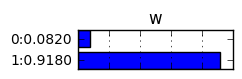

In [27]:
%matplotlib inline
gnb.showProba(ie.posterior(w))

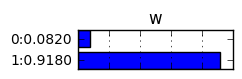

In [28]:
gnb.showPosterior(bn,'w',{'s':1,'c':0})

## inference in the whole Bayes net

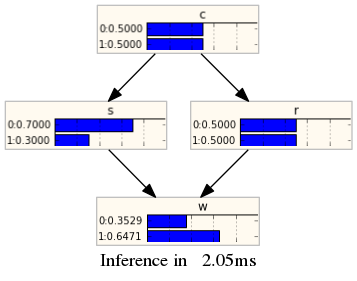

In [29]:
gnb.showInference(bn,evs={})

### inference with evidence

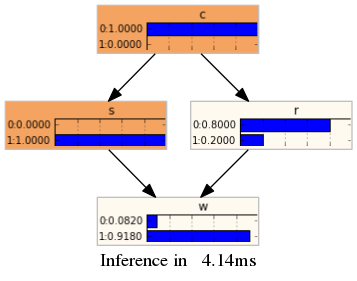

In [30]:
gnb.showInference(bn,evs={'s':1,'c':0})

### inference with soft and hard evidence

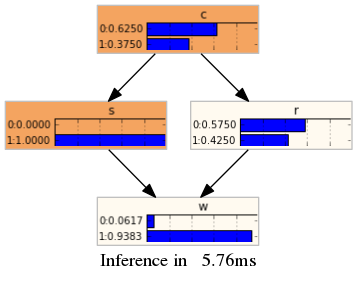

In [31]:
gnb.showInference(bn,evs={'s':1,'c':[0.3,0.9]})

### inference with partial targets

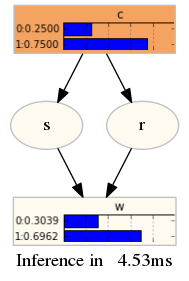

In [32]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'})